# E3.A c)- Task

In [45]:
reset -f

In [46]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Define symbolic variables

In [47]:
L, q0, x  = sp.symbols('L, q0, x', real = 'True')
Ax, Ay, MAz = sp. symbols('Ax, Ay, MAz', real = 'True')

In [48]:
def q(xL, xH, L):
    return sp.integrate(- q0/L *x+ q0, (x, xL, xH))

In [49]:
eq1 = sp.Eq(0 , Ax)
eq2 = sp.Eq(0 , Ay - q(0, L, L))
eq3 = sp.Eq(0, MAz - q(0, L, L)*L/3)

In [50]:
sol = sp.solve([eq1, eq2, eq3],[Ax, Ay, MAz])
sol

{Ax: 0, Ay: L*q0/2, MAz: L**2*q0/6}

In [51]:
Ax, Ay, MAz = sol.values()

# Internal force reactions

## Define symbolic functions

In [52]:
N = sp.Function('N')(x)
Q = sp.Function('Q')(x)
Mbz = sp.Function('Mbz')(x) 

## Set up equations

In [53]:
eq11 = sp.Eq(0, -N) 
eq12 = sp.Eq(0, -Q - q(x, L, L))
eq13 = sp.Eq(0, -Mbz - q(x, L, L)*(L-x)/3)

# solve equations

In [54]:
sol = sp.solve([eq11, eq12, eq13],[N, Q, Mbz])
sol

{N(x): 0,
 Q(x): (-L**2*q0 + 2*L*q0*x - q0*x**2)/(2*L),
 Mbz(x): (-L**3*q0 + 3*L**2*q0*x - 3*L*q0*x**2 + q0*x**3)/(6*L)}

In [55]:
N, Q, Mbz = sol.values()

# Stress

In [56]:
E, h, b, y = sp.symbols('E, h, b,y', real = 'True')

In [57]:
Iz = b*h**3/12

In [58]:
sigma = -Mbz/Iz * y
display(sigma.subs([(x,0),(y,h/2)]))

L**2*q0/(b*h**2)

# Deformation

In [59]:
v = sp.Function('v')

In [60]:
eq = sp.Eq(sp.diff(v(x),x,x), Mbz/(E*Iz))
display(eq)

Eq(Derivative(v(x), (x, 2)), 2*(-L**3*q0 + 3*L**2*q0*x - 3*L*q0*x**2 + q0*x**3)/(E*L*b*h**3))

In [61]:
bc = {v(0):0, sp.diff(v(x),x).subs(x, 0):0}

In [62]:
sol = sp.dsolve(eq, ics = bc)
v = sol.rhs
display(sol)
display(sol.subs(x,L))

Eq(v(x), -L**2*q0*x**2/(E*b*h**3) + L*q0*x**3/(E*b*h**3) - q0*x**4/(2*E*b*h**3) + q0*x**5/(10*E*L*b*h**3))

Eq(v(L), -2*L**4*q0/(5*E*b*h**3))

In [63]:
v = v.subs([(L, 100), (h, 2), (b, 15), (E, 210000)])

In [66]:
v_fun = sp.lambdify((x ,q0), v, 'numpy')
s = np.arange(0,100,0.1)

Text(0, 0.5, 'v(x)')

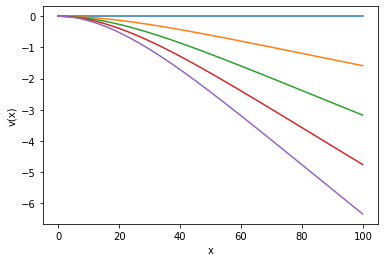

In [67]:
plt.plot(s, v_fun(s,0))
plt.plot(s, v_fun(s,1))
plt.plot(s, v_fun(s,2))
plt.plot(s, v_fun(s,3))
plt.plot(s, v_fun(s,4))
plt.xlabel('x')
plt.ylabel('v(x)')